In [1]:
import pandas as pd
import tensorflow as tf

In [41]:
# column_names = ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
column_names = ['district', 'rps03', 'rps09', 'rps11', 'rps15', 'rps16', 'rps17', 'rps18', 'rps28', 'rps30', 'rps31']

In [51]:
df = pd.read_csv('不動產實價登錄資訊.csv')
# filter out rps01: 只保留有包含「房地」的
df = df[df['rps01'].str.contains('房地')]
# filter out rps11: 只保留不包含「其他」的
df = df[~df['rps11'].str.contains('其他')]
# filter out rps12: 只保留包含「住家用」的
df = df[df['rps12'].str.contains('住家用', na=False)]

df_price = df['rps22']

df = df[['district', 'rps03', 'rps09', 'rps11', 'rps15', 'rps16', 'rps17', 'rps18', 'rps28', 'rps30', 'rps31']]

# factorize district
df['district'] = pd.factorize(df['district'])[0]
df['rps09'] = pd.factorize(df['rps09'])[0]
df['rps11'] = pd.factorize(df['rps11'])[0]
df['rps31'] = pd.factorize(df['rps31'])[0]

# replace column names in df to ['鄉鎮市區', '土地移轉總面積平方公尺', '移轉層次', '建物型態', '建物移轉總面積平方公尺', '房', '廳', '衛', '主建物面積', '陽台面積', '電梯']
df_data = pd.DataFrame(df, columns=column_names)

df_data




,district,rps03,rps09,rps11,rps15,rps16,rps17,rps18,rps28,rps30,rps31
0,0,3.82,0,0,29.83,1,1,1,21.74,3.41,0
5,1,5.96,1,0,77.86,2,1,1,30.70,10.73,0
7,2,16.94,2,0,42.58,0,0,0,32.38,3.92,0
16,0,21.03,3,0,114.11,3,2,2,74.47,7.82,0
17,3,31.98,4,1,149.96,3,2,2,44.48,3.28,0
...,...,...,...,...,...,...,...,...,...,...,...
64183,15,8.46,28,0,57.27,1,0,1,33.04,2.94,0
64184,1,12.84,3,0,163.82,3,2,2,78.79,8.07,0
64185,1,19.90,11,0,237.99,3,2,3,124.42,12.69,0
64186,1,20.81,28,0,268.68,3,2,3,124.42,12.69,0


In [ ]:
df_data.isnull().any()

In [ ]:
df_data.corr(method="pearson")


Matplotlib is building the font cache; this may take a moment.


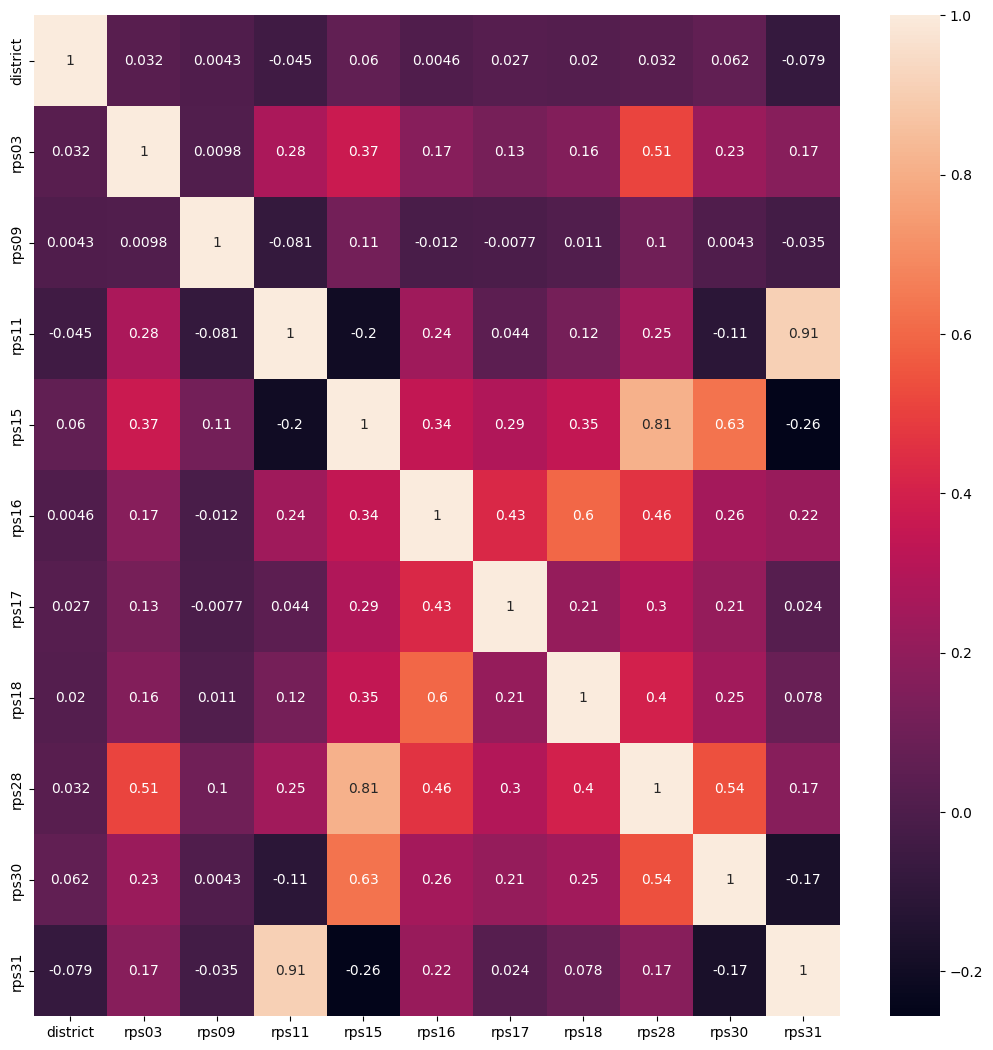

In [50]:
import seaborn as sns # 引入seaborn
import matplotlib.pyplot as plt # 引入pyplot

plt.figure(figsize= (13, 13)) # 圖形大小
sns.heatmap(df_data.corr(),annot = True) # 塗顏色
plt.show() # 顯示圖形

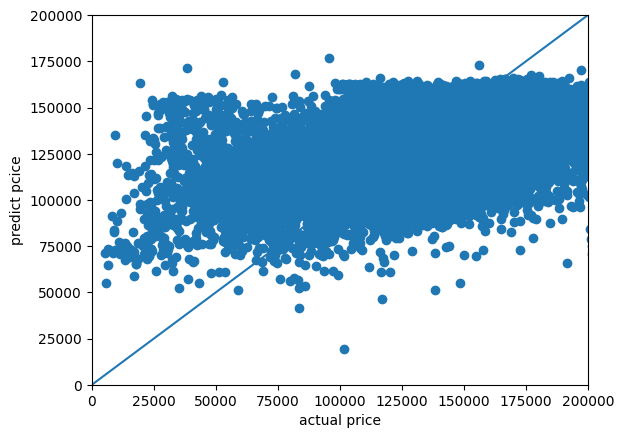

In [80]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot

x = df # 13個特徵的數據
# y = df_price_normalized # 房價數據
y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

# y_test = scaler.inverse_transform(y_test)
# y_predict_inverse = scaler.inverse_transform(y_predict)

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.xlim(0, 200000) # x軸的範圍
plt.ylim(0, 200000) # y軸的範圍
plt.plot([0,200000], [0,200000]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [82]:
lnregr.score(x_train, y_train) # 訓練模型的正確率

0.18738431576002867

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
df_price_normalized = pd.DataFrame(scaler.fit_transform(df_price.to_numpy().reshape(-1, 1)))

In [89]:
df_price_normalized

,0
0,-0.091634
1,0.902611
2,-1.823907
3,-0.298960
4,-0.069203
...,...
45278,0.946574
45279,0.687685
45280,0.714561
45281,0.659603


In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = df # 13個特徵的數據
y = df_price_normalized # 房價數據
# y = df_price # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

input_dim = 11

# Create a Sequential model
model = Sequential()

# Add an input layer and a hidden layer with 32 neurons
model.add(Dense(32, input_dim=input_dim, activation='relu'))

# Add another hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))

# Add an output layer with 1 neuron (for regression)
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Make predictions
y_predict = model.predict(x_test)

Epoch 1/50
991/991 [==============================] - 1s 470us/step - loss: 3.0528 - mae: 0.9822
Epoch 2/50
991/991 [==============================] - 0s 421us/step - loss: 1.3292 - mae: 0.7859
Epoch 3/50
991/991 [==============================] - 0s 412us/step - loss: 1.8318 - mae: 0.8027
Epoch 4/50
991/991 [==============================] - 0s 411us/step - loss: 5.7954 - mae: 0.8793
Epoch 5/50
991/991 [==============================] - 0s 418us/step - loss: 1.9179 - mae: 0.8408
Epoch 6/50
991/991 [==============================] - 0s 468us/step - loss: 6.0653 - mae: 0.9546
Epoch 7/50
991/991 [==============================] - 0s 416us/step - loss: 8.4953 - mae: 0.9475
Epoch 8/50
991/991 [==============================] - 0s 409us/step - loss: 7.2619 - mae: 0.9833
Epoch 9/50
991/991 [==============================] - 0s 410us/step - loss: 8.2630 - mae: 1.0880
Epoch 10/50
991/991 [==============================] - 0s 425us/step - loss: 1.7079 - mae: 0.8072
Epoch 11/50
991/991 [========

In [91]:
y_predict_inverse = scaler.inverse_transform(y_predict)

In [94]:
import numpy as np
y_test_inverse = scaler.inverse_transform(y_test)
mean = np.mean(np.abs(y_test_inverse - y_predict_inverse))
mean

29105.274532601445